# Heart Disease Prediction 
  - age group (10-20)
  - age group (20-30)
  - age group (30-40)
  - age group (40-50)
  - age group (50-60)
  - age group (60-70)
## Models used are: Simple Linear Regression, Multiple Linear Regression, Logistic Regression, K - means clustering, Hierarchial clustering, Gaussian Naive Bayes, Multinomial Naive Bayes,  Bernoulli Naive Bayes, Decision Tree Classifier, XGB Classifier,  Random Forest

# 1.Introduction

## The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

# 2. Domain Knowledge

### sex: Binary variable indicating gender (1 for male, 0 for female).
### age: Age of the individual.
### education: Level of education (categorical).
### currentSmoker: Binary variable indicating if the individual is a current smoker (1 for yes, 0 for no).
### cigsPerDay: Number of cigarettes smoked per day.
### BPMeds: Binary variable indicating if the individual is on blood pressure medication (1 for yes, 0 for no).
### prevalentStroke: Binary variable indicating if the individual has had a prevalent stroke (1 for yes, 0 for no).
### prevalentHyp: Binary variable indicating if the individual has prevalent hypertension (1 for yes, 0 for no).
### diabetes: Binary variable indicating if the individual has diabetes (1 for yes, 0 for no).
### totChol: Total cholesterol level.
### sysBP: Systolic blood pressure.
### diaBP: Diastolic blood pressure.
### BMI: Body mass index.
### heartRate: Heart rate.
### glucose: Glucose level.
### TenYearCHD: Binary variable indicating if the individual developed coronary heart disease within the next ten years (1 for yes, 0 for no).

# 3. Why the dataset was chosen ?

## With recent advancement in technology ,people are able to do tasks in just one click where at once it was tiresome. People are not physically active nowadays nor healthy yet they have better availabilty of good foods and access to all information one needs to keep one healthy.
## This dataset provides some specific criteria on which one can be judged that one might get Heart disease in recent future or not.
## Here I have applied different ML models by splitting the data in Train and Test set. This provides probability on features/ columns if He/ She might get heart disease.

# 4. Importing all the neccessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Numpy for Linear Algebra
### Pandas for data processing, CSV file I/O
### Matplotlib for data visualization purposes
### Seaborn for statistical data visualization

In [2]:
df = pd.read_csv('framingham.csv') # Reading the dataset using pandas 

In [3]:
df.head() # print 5 rows as default

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 5. EDA

In [4]:
column_name_changes = {'currentSmoker': 'is_smoking', 'male': 'sex'} # changing the column names for Currentsmoker and maLe
df = df.rename(columns=column_name_changes)   

In [5]:
df.drop(['education'], inplace = True, axis = 1) # dropping the column education

In [6]:
df.head()

,sex,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.info() # provides the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   is_smoking       4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [8]:
df.shape # provies the shape of the dataset with format of rows and columns

(4240, 15)

In [9]:
df.describe() #provides the description of the dataframe

,sex,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.isnull().sum() # calculates the number of null values

sex                  0
age                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='cigsPerDay'>

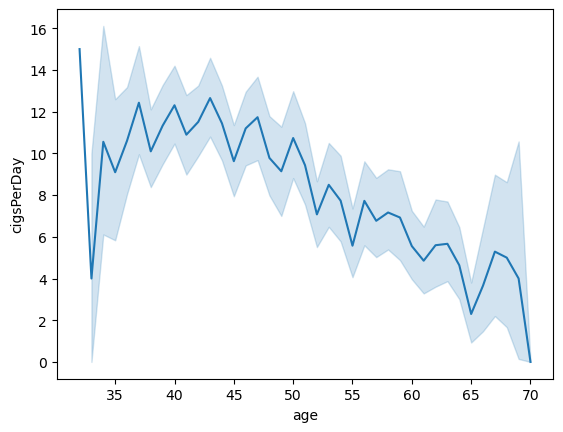

In [11]:
sns.lineplot(data= df, x ="age", y = "cigsPerDay")

# Shows the number of cigarette smoked by different age with age preceding 35 being highest.


<AxesSubplot:xlabel='age', ylabel='totChol'>

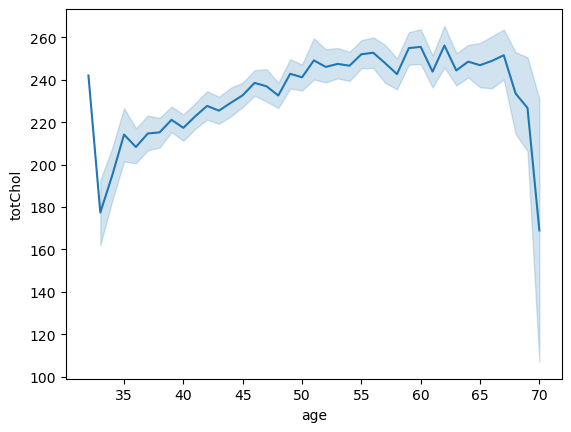

In [12]:
sns.lineplot(data= df, x ="age", y = "totChol")

# Shows the total cholesterol level pf age group 65 to 70 being the highest. 

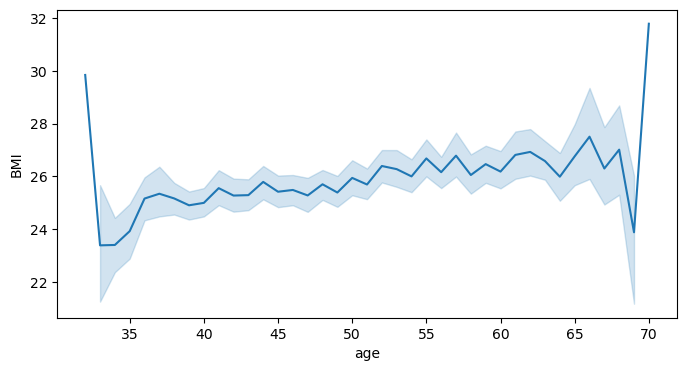

In [13]:
plt.figure(figsize=(8,4))
sns.lineplot(data= df, x ="age", y = "BMI")
plt.show()

## Calculating the percentage of missing values

In [14]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
        
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


## Dropping all the missing values

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isnull().sum() # conformation if there is any missing values

sex                0
age                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
df.TenYearCHD.value_counts() # counting the values for 0's and 1's

0    3179
1     572
Name: TenYearCHD, dtype: int64

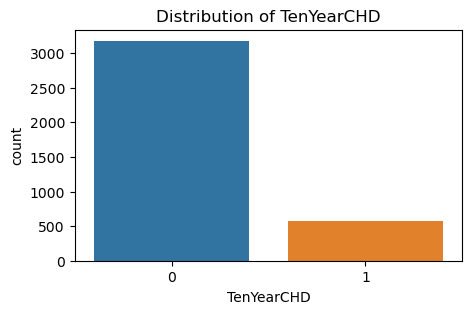

In [18]:
# Distribution of the target variable (TenYearCHD)
plt.figure(figsize=(5, 3))
plt.title('Distribution of TenYearCHD')
sns.countplot(x='TenYearCHD', data=df)

plt.show()

### TenYearCHD: Binary variable indicating if the individual developed coronary heart disease within the next ten years (1 for yes, 0 for no).

## Generating synthetic data for ages between 20 to 30
## Assuming synthetic data with random values within the observed range for other columns

In [19]:

np.random.seed(42)
synthetic_data = pd.DataFrame({
    'sex': np.random.randint(0, 2, size=1000),  # Assuming gender randomly distributed
    'age': np.random.randint(20, 31, size=1000),
    'is_smoking': np.random.randint(0, 2, size=1000),
    'cigsPerDay': np.random.randint(0, 40, size=1000),
    'BPMeds': np.random.randint(0, 2, size=1000),
    'prevalentStroke': np.random.randint(0, 2, size=1000),
    'prevalentHyp': np.random.randint(0, 2, size=1000),
    'diabetes': np.random.randint(0, 2, size=1000),
    'totChol': np.random.randint(150, 350, size=1000),
    'sysBP': np.random.randint(80, 250, size=1000),
    'diaBP': np.random.randint(50, 150, size=1000),
    'BMI': np.random.uniform(15, 40, size=1000),
    'heartRate': np.random.randint(50, 100, size=1000),
    'glucose': np.random.randint(50, 150, size=1000),
    'TenYearCHD': np.random.randint(0, 2, size=1000)
})


In [20]:
synthetic_data.head()

,sex,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,25,1,1,1,0,0,1,229,156,61,15.040030,53,105,0
1,1,20,1,22,0,0,1,0,253,248,148,22.080477,71,129,0
2,0,28,1,18,1,1,0,1,332,189,63,37.035258,75,86,1
3,0,20,0,30,0,1,1,1,295,222,71,29.841215,81,78,0
4,0,24,1,4,1,0,1,0,183,185,100,30.196571,73,61,0


In [21]:
# Combine original data with synthetic data
n_df = pd.concat([df, synthetic_data])

In [22]:
n_df.head()

,sex,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
n_df.shape

(4751, 15)

In [24]:
n_df.isnull().sum()

sex                0
age                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Simple Linear Regression

### Importing all the necessary libaries 

In [25]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error

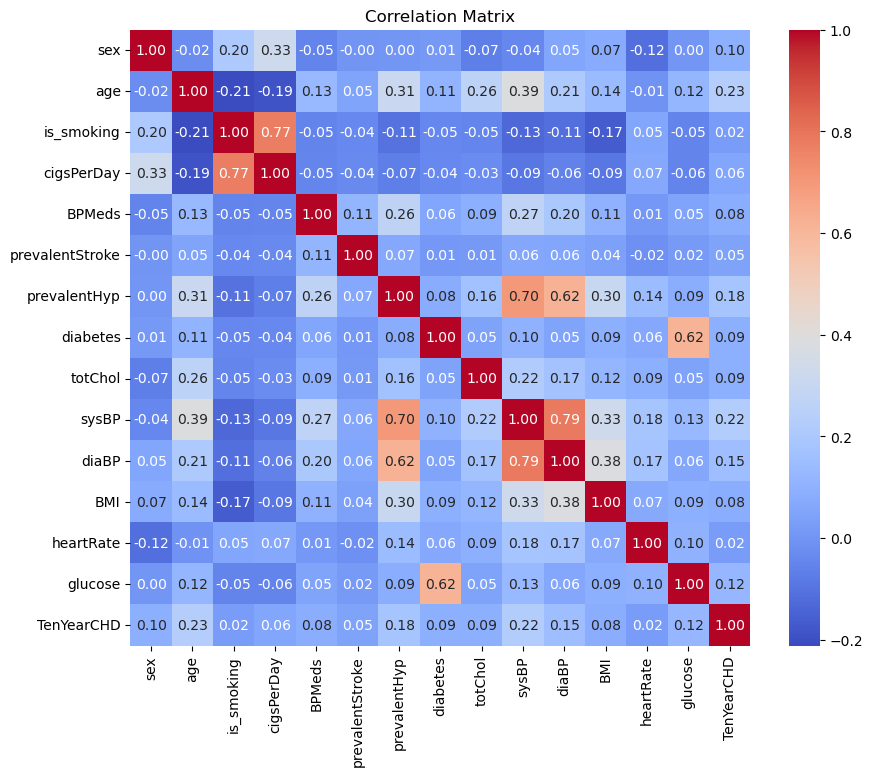

In [26]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## count plot for no . of cigarette smoken per day.

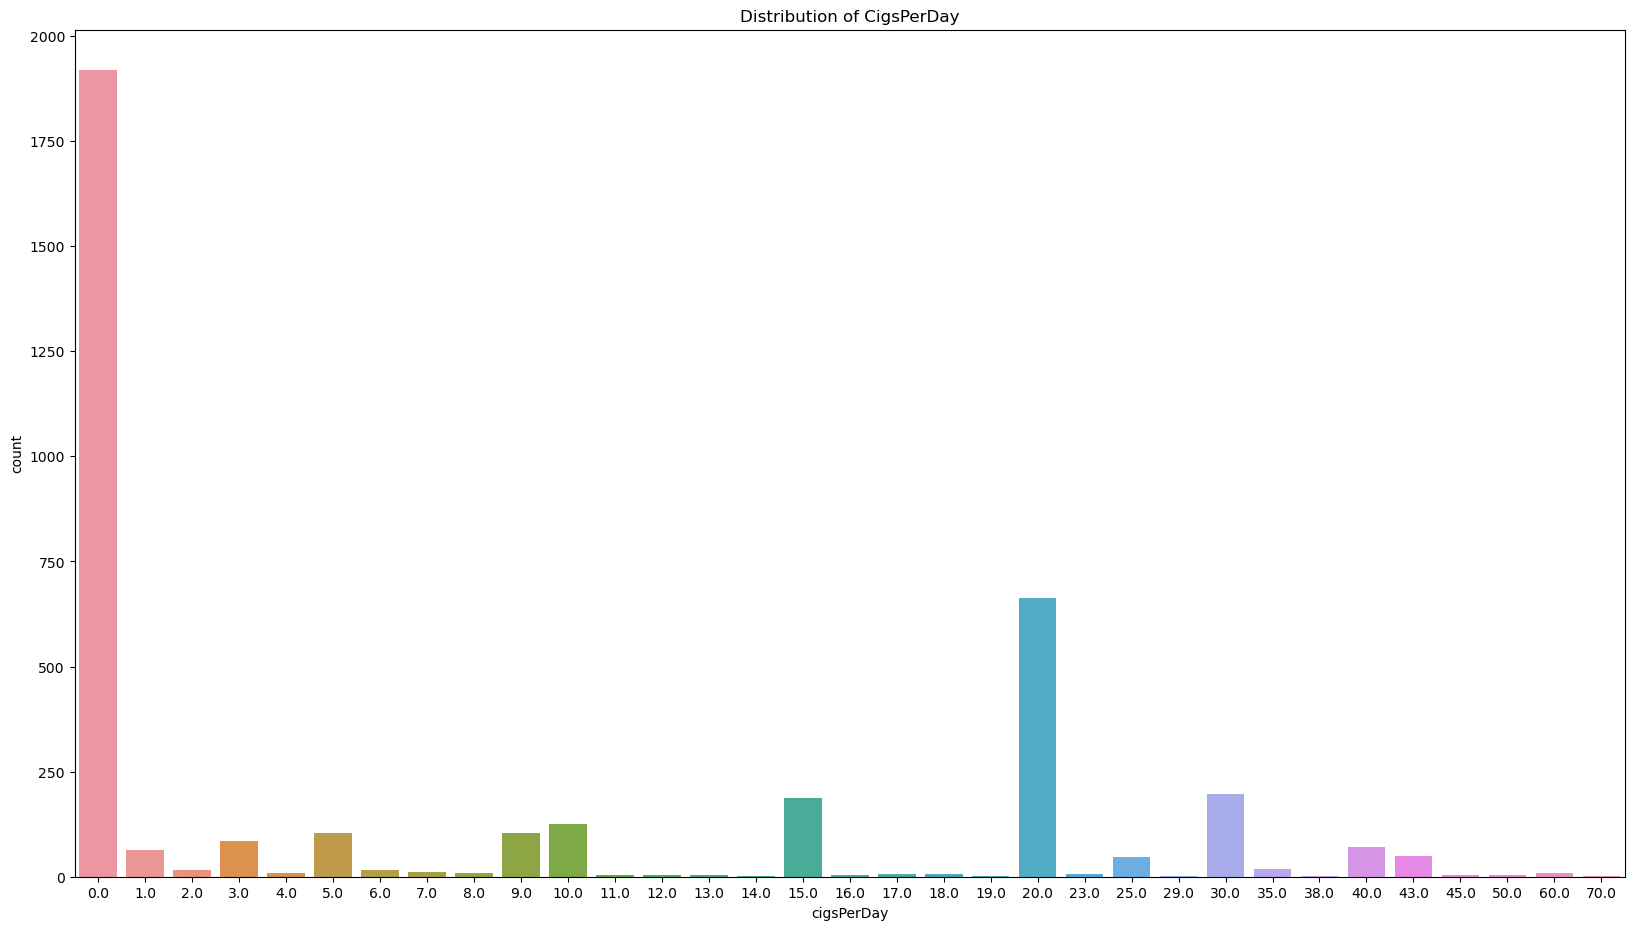

In [27]:
plt.figure(figsize=(20,11))
sns.countplot(x='cigsPerDay', data=df)
plt.title('Distribution of CigsPerDay')
plt.show()

## Splitting the data into features and target variable and transforming the shape to 2D 

In [28]:
X = df['age'].values.reshape(-1,1)
y = df['TenYearCHD'].values.reshape(-1,1)


In [29]:
X.shape

(3751, 1)

In [30]:
y.shape

(3751, 1)

## Splitting the data into training and testing sets where test size is given 20 percent and train size is given 80 percent. The model is trained using trained sets and predicted using test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating the Linear regression object

In [32]:
model = LinearRegression()

## Training the model

In [33]:
model.fit(X_train, y_train)

LinearRegression()

## Making predictions on test dataset

In [34]:
y_pred = model.predict(X_test)

## Calculating r2 score
    # model explains the variance in the dependent (target) variable.

In [35]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.05189802054914128


## In this case, the R-squared score is relatively low, suggesting that the linear regression model may not capture the underlying relationships between the features and the TenYearCHD target variable very effectively.






In [36]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse )

Mean Squared Error:  0.13488239671060512


## In this case, the Mean Squared Error (MSE) is indicating that the linear regression model may not capture the underlying relationships between the features and the TenYearCHD target variable effectively.

# 7. Multiple Linear Regression model

### Splitting the data in X and y

In [37]:
X = df[['age', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']] # here I have more features or cloumns
y = df['TenYearCHD']

### Splitting the data in Training and Testing data where test size is 20%

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating the object of LinearRegression

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train) # trainig the model

LinearRegression()

In [41]:
y_pred = model.predict(X_test)


In [42]:
# Caculating r2 score 
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.04638649780111437


## The R-squared score of 0.046 suggests that the model does not fully capture the variability in the TenYearCHD values. This indicates that the selected features ('age', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose') may not be sufficient for accurately predicting the TenYearCHD.

In [43]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse )

Mean Squared Error:  0.1356664973810936


## In this case, the Mean Squared Error (MSE) is relatively high, indicating that the linear regression model may not capture the underlying relationships between the features and the TenYearCHD target variable effectively.

# 8. Logistic Regression

Importing all the necessary libaries

In [44]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

splitting the data in terms of independent and dependent variables

In [45]:
X = df[['age', 'sex', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = df['TenYearCHD'].values.reshape(-1,1)


In [46]:
y.shape

(3751, 1)

splitting the data in terms of Train set and Test set

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [48]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3000, 6) (3000, 1)
Test set: (751, 6) (751, 1)


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

F:\P\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\P\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Calculating the accuracy score 
   Accuracy score is used to evaluate the performance of the model.
   It is defined as the ratio of the number of correct predictions (both true positives and true negatives) to the total number    of predictions made

In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8748335552596538


## Creating a Confusion matrix 
 - A confusion matrix is a commonly used tool for evaluating the performance of classification models. It is a table that       summarizes how well a model is performing by comparing the actual class labels (ground truth) with the predicted class labels from the model.

<AxesSubplot:>

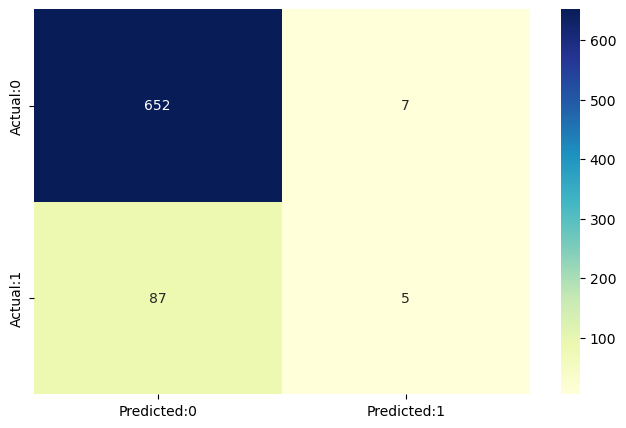

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP = 615, FN = 7
FP = 124, TN = 5

Correct Predictions=TP+TN = 615+5 = 620
Incorrect Predictions=FP+FN = 124+5 = 129


# Logistic Regression on synthetic data

In [52]:
n_df.head()

,sex,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [53]:
n_df.shape

(4751, 15)

In [54]:
X = n_df[['age', 'sex', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]
y = n_df['TenYearCHD'].values.reshape(-1,1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [56]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3800, 6) (3800, 1)
Test set: (951, 6) (951, 1)


In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

F:\P\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.7791798107255521


<AxesSubplot:>

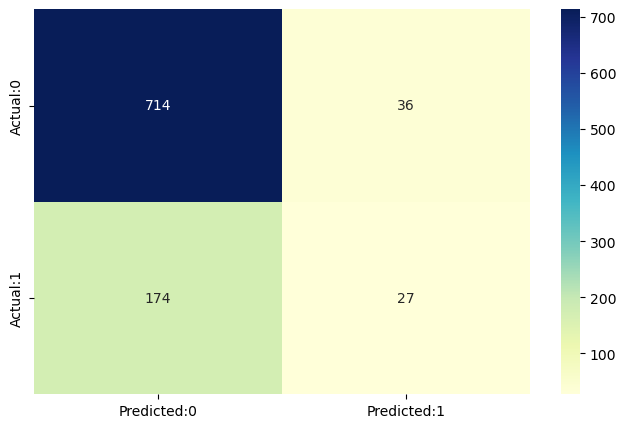

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP = 714, FN = 36
FP = 174, TN = 27

Correct Predictions=TP+TN = 714+27 = 741
Incorrect Predictions=FP+FN = 174+36 = 210


# When using synthetic data combined with the actual data , the Correct prediction increased by 16 percent 

# 9. Using K-means clustering

# Importing necessary libraries

In [60]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Filtering data for ages between 20 to 30

In [61]:
data_20_to_30 = n_df[(n_df['age'] >= 20) & (n_df['age'] <= 30)].copy()

# Selecting features for clustering

In [62]:
cluster_features = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Standardize the features

In [63]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_20_to_30[cluster_features])

# Perform K-means clustering

In [64]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_20_to_30['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters (using pairplot for selected features)

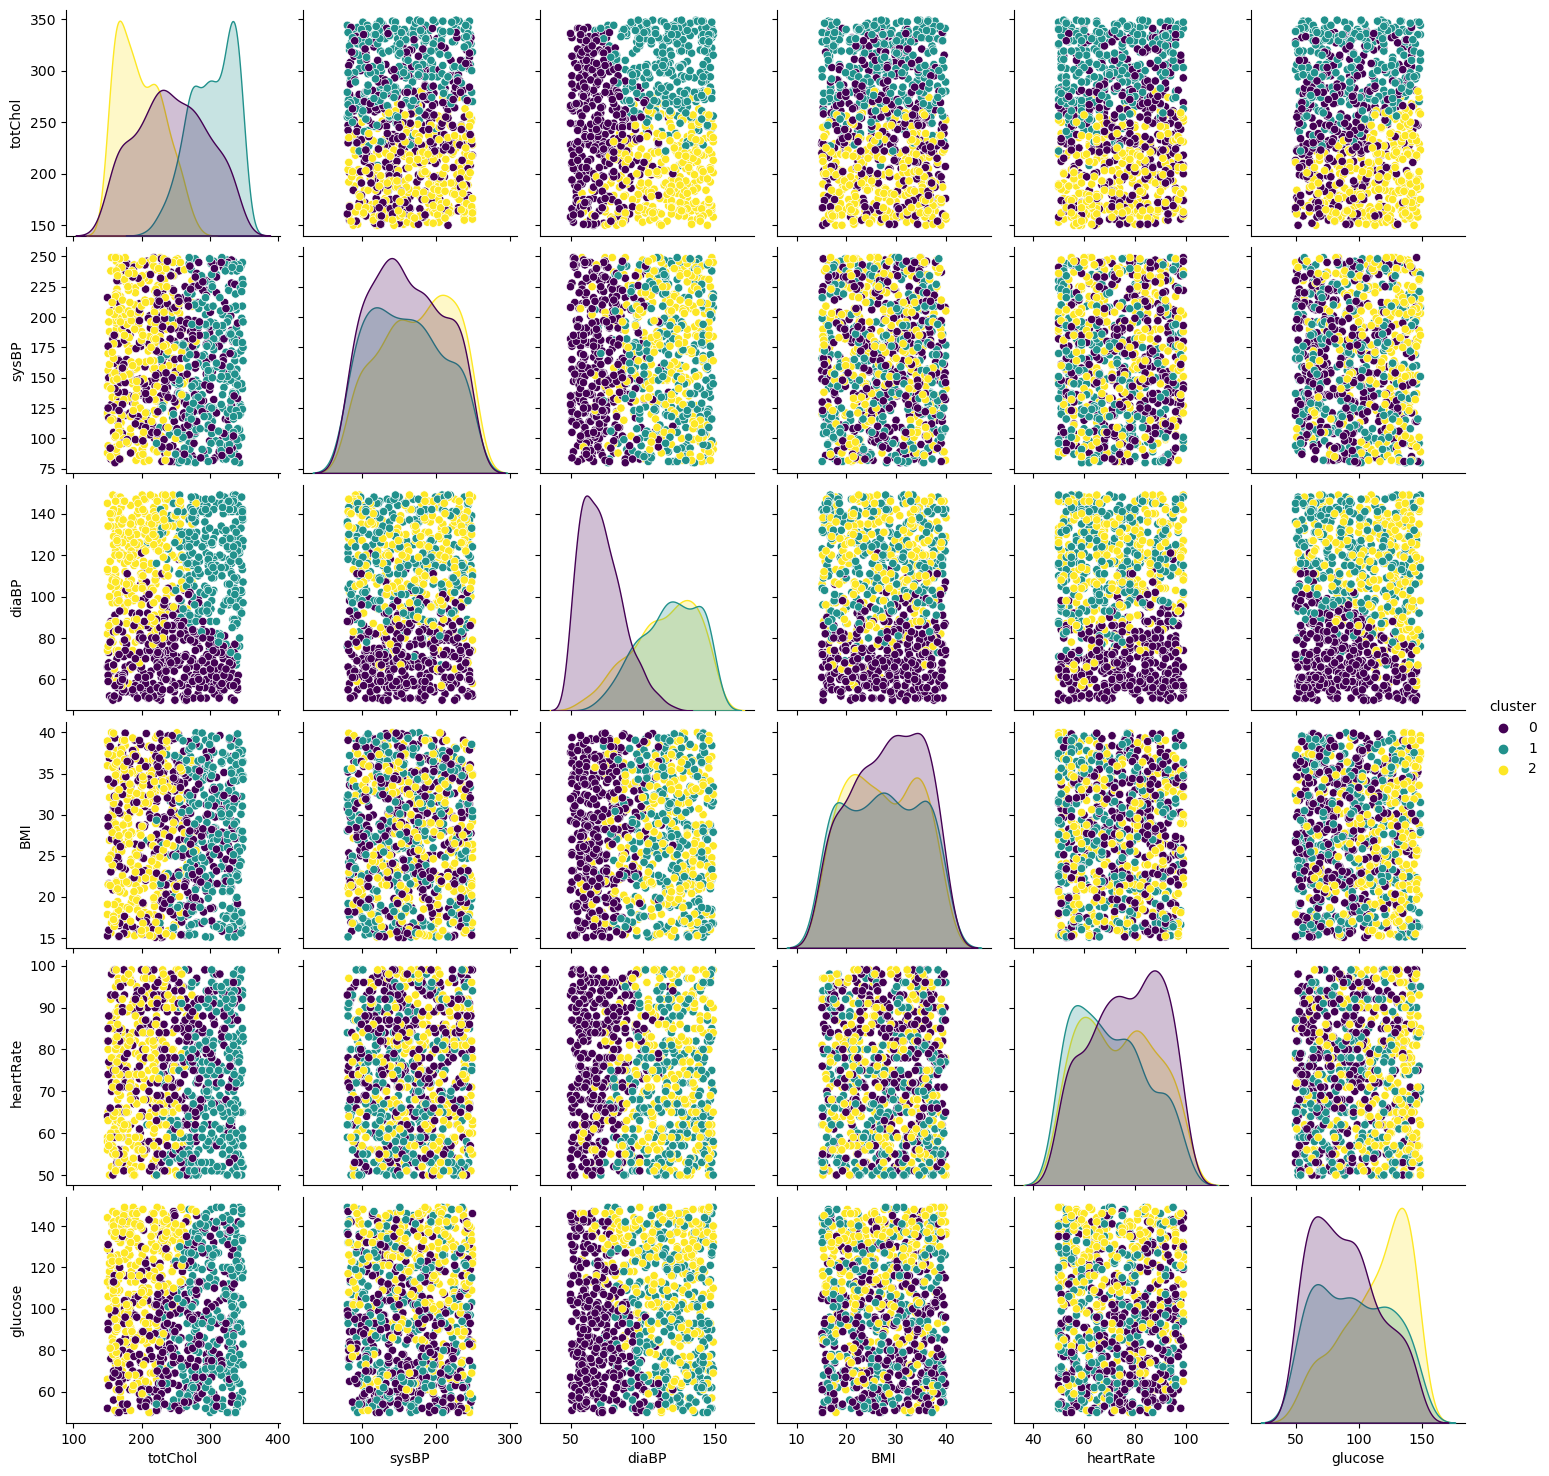

In [65]:
sns.pairplot(data_20_to_30, hue='cluster', vars=cluster_features, palette='viridis')
plt.show()

# Applying Hierarchial Clustering 

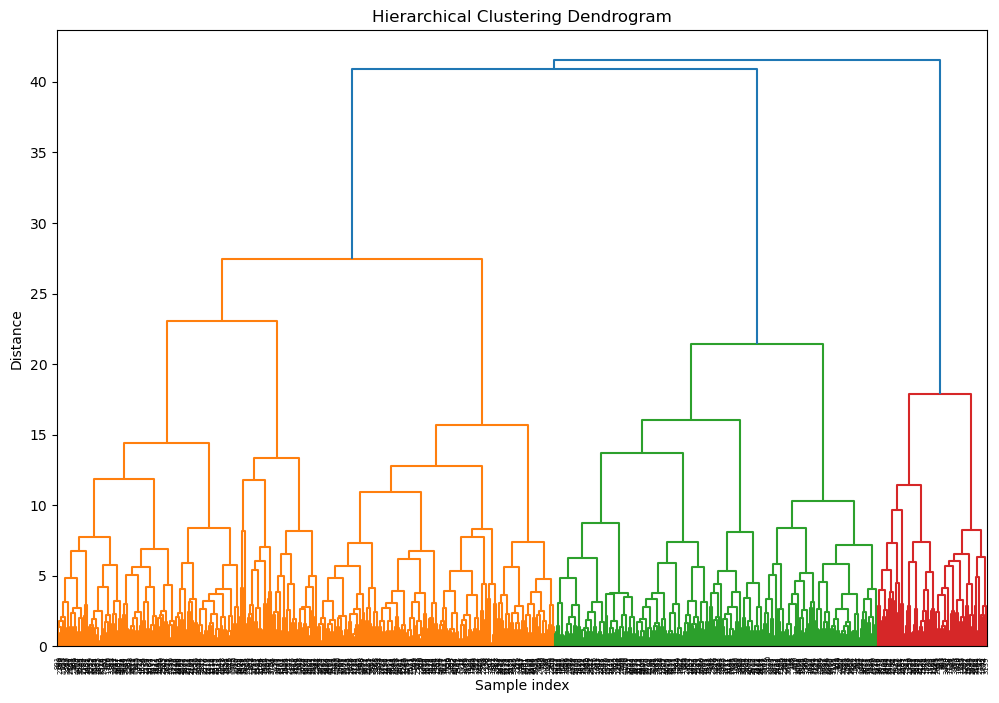

In [66]:
# importing the libaries
from scipy.cluster.hierarchy import dendrogram, linkage



# Filter data for ages between 30 to 40
data_30_to_40 = df[(df['age'] >= 30) & (df['age'] <= 40)].copy()

# Select features for clustering
X = data_30_to_40[['age', 'sex', 'is_smoking', 'cigsPerDay', 'totChol', 'sysBP', 'heartRate', 'glucose', 'prevalentHyp']]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply hierarchical clustering
# Here, we use the 'ward' method for clustering. Other options include 'single', 'complete', 'average', etc.
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data_30_to_40.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# used seaborn to create a cluster heatmap 
#plt.figure(figsize=(12, 10))
#sns.clustermap(X_scaled, metric='euclidean', method='ward', cmap='coolwarm')
#plt.title('Hierarchical Clustering Heatmap')
#plt.show()


Hierarchical clustering builds a tree of clusters known as a dendrogram. Each node of the dendrogram represents a cluster.
 The dendrogram shows the hierarchical relationship between data points, clusters, and their merge distances.
 By analyzing the dendrogram, one can decide on an appropriate number of clusters. Typically, this involves identifying the     tallest vertical lines that don't cross any horizontal lines (known as the tallest non-horizontal line), which indicates a good  separation between clusters.
 The optimal number of clusters can be chosen based on this analysis, balancing the desired level of granularity with practical considerations.

By utilizing dendrograms, you can visually inspect the hierarchical clustering structure and make informed decisions about the number of clusters to use in your analysis.

# 10. Creating a machine learning model to predict if individuals aged 10 to 20 have a higher chance of heart disease or not.

In [67]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Filter data for ages between 10 to 20
data_10_to_20 = n_df[(n_df['age'] >= 10) & (n_df['age'] <= 20)].copy()

# Select features and target variable
X = data_10_to_20[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_10_to_20['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5238095238095238


# 11. Creating a machine learning model to predict if individuals aged 20 to 30 have a higher chance of heart disease or not.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Filter data for ages between 10 to 20
data_10_to_20 = n_df[(n_df['age'] >= 10) & (n_df['age'] <= 20)].copy()

# Select features and target variable
X = data_10_to_20[['age', 'sex', 'is_smoking', 'cigsPerDay', 'totChol', 'sysBP', 'heartRate', 'glucose', 'prevalentHyp']]
y = data_10_to_20['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Making predictions using the model's predicted probabilities
# predict_proba() returns probabilities for each class (0 and 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Taking probabilities for class 1 (prone to heart disease)

# You can set a threshold to convert probabilities to binary predictions if needed
threshold = 0.5
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Model evaluation
# Calculate accuracy using binary predictions
accuracy = accuracy_score(y_test, y_pred_class)

# Calculate the Area Under the Receiver Operating Characteristic (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Display the first few predicted probabilities
print("First few predicted probabilities of heart disease:", y_pred_prob[:5])


Accuracy: 0.5238095238095238
ROC AUC: 0.6018518518518519
First few predicted probabilities of heart disease: [0.66246492 0.68634974 0.67995735 0.63872122 0.71852061]


# 12. Creating a machine learning model to predict if individuals aged 30 to 40 have a higher chance of heart disease or not.

In [69]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Filter data for ages between 30 to 40
data_30_to_40 = n_df[(n_df['age'] >= 30) & (n_df['age'] <= 40)].copy()

# Select features and target variable
X = data_30_to_40[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_30_to_40['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Making predictions using the model's predicted probabilities
# predict_proba() returns probabilities for each class (0 and 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Taking probabilities for class 1 (prone to heart disease)

# You can set a threshold to convert probabilities to binary predictions if needed
threshold = 0.5
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Model evaluation
# Calculate accuracy using binary predictions
accuracy = accuracy_score(y_test, y_pred_class)

# Calculate the Area Under the Receiver Operating Characteristic (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Display the first few predicted probabilities
print("First few predicted probabilities of heart disease:", y_pred_prob[:5])

Accuracy: 0.9013157894736842
ROC AUC: 0.9120082815734989
First few predicted probabilities of heart disease: [0.04698586 0.11543329 0.06141354 0.02578774 0.03577023]


# 13. Creating a machine learning model to predict if individuals aged 40 to 50 have a higher chance of heart disease or not.

In [70]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
# Filter data for ages between 40 to 50
data_40_to_50 = n_df[(n_df['age'] >= 40) & (n_df['age'] <= 50)].copy()

# Select features and target variable
X = data_40_to_50[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_40_to_50['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)
# Making predictions using the model's predicted probabilities
# predict_proba() returns probabilities for each class (0 and 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Taking probabilities for class 1 (prone to heart disease)

# You can set a threshold to convert probabilities to binary predictions if needed
threshold = 0.5
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Model evaluation
# Calculate accuracy using binary predictions
accuracy = accuracy_score(y_test, y_pred_class)

# Calculate the Area Under the Receiver Operating Characteristic (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Display the first few predicted probabilities
print("First few predicted probabilities of heart disease:", y_pred_prob[:5])

Accuracy: 0.878125
ROC AUC: 0.7066069428891377
First few predicted probabilities of heart disease: [0.1332474  0.13709094 0.11103315 0.03896362 0.1457895 ]


# 14. Creating a machine learning model to predict if individuals aged 50 to 60 have a higher chance of heart disease or not.

In [71]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score


# Filter data for ages between 50 to 60
data_50_to_60 = n_df[(n_df['age'] >= 50) & (n_df['age'] <= 60)].copy()

# Select features and target variable
X = data_50_to_60[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_50_to_60['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Making predictions using the model's predicted probabilities
# predict_proba() returns probabilities for each class (0 and 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Taking probabilities for class 1 (prone to heart disease)

# You can set a threshold to convert probabilities to binary predictions if needed
threshold = 0.5
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Model evaluation
# Calculate accuracy using binary predictions
accuracy = accuracy_score(y_test, y_pred_class)

# Calculate the Area Under the Receiver Operating Characteristic (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Display the first few predicted probabilities
print("First few predicted probabilities of heart disease:", y_pred_prob[:5])

Accuracy: 0.8188976377952756
ROC AUC: 0.7110106910613909
First few predicted probabilities of heart disease: [0.12314793 0.12465292 0.10355153 0.42605934 0.40547862]


# 15. Creating a machine learning model to predict if individuals aged 60 to 70 have a higher chance of heart disease or not.

In [72]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Filter data for ages between 60 to 70
data_60_to_70 = n_df[(n_df['age'] >= 60) & (n_df['age'] <= 70)].copy()

# Select features and target variable
X = data_60_to_70[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_60_to_70['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Making predictions using the model's predicted probabilities
# predict_proba() returns probabilities for each class (0 and 1)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Taking probabilities for class 1 (prone to heart disease)

# You can set a threshold to convert probabilities to binary predictions if needed
threshold = 0.5
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Model evaluation
# Calculate accuracy using binary predictions
accuracy = accuracy_score(y_test, y_pred_class)

# Calculate the Area Under the Receiver Operating Characteristic (ROC AUC) score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

# Display the first few predicted probabilities
print("First few predicted probabilities of heart disease:", y_pred_prob[:5])

Accuracy: 0.7560975609756098
ROC AUC: 0.6338734567901234
First few predicted probabilities of heart disease: [0.38367295 0.1628565  0.35935765 0.19901353 0.30182133]


# 17. Applying Naive bayes for age group 30 to 40

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Filter data for ages between 30 to 40
data_30_to_40 = n_df[(n_df['age'] >= 30) & (n_df['age'] <= 40)].copy()

# Select features and target variable
X = data_30_to_40[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_30_to_40['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the Naive Bayes model
model = GaussianNB()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8881578947368421


In [74]:
prediction = model.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0]


<AxesSubplot:>

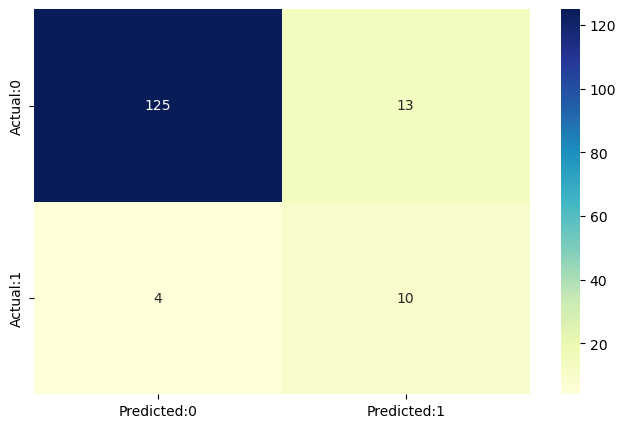

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP = 125, FN = 13 FP = 4, TN = 10

Correct Predictions=TP+TN = 125+10 = 135 Incorrect Predictions=FP+FN = 4+13= 17

#  Applying Multinomial Naive bayes for age group 30 to 40

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Filter data for ages between 30 to 40
data_30_to_40 = n_df[(n_df['age'] >= 30) & (n_df['age'] <= 40)].copy()

# Select features and target variable
X = data_30_to_40[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_30_to_40['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the Multinomial Naive Bayes model
model = MultinomialNB()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8026315789473685


<AxesSubplot:>

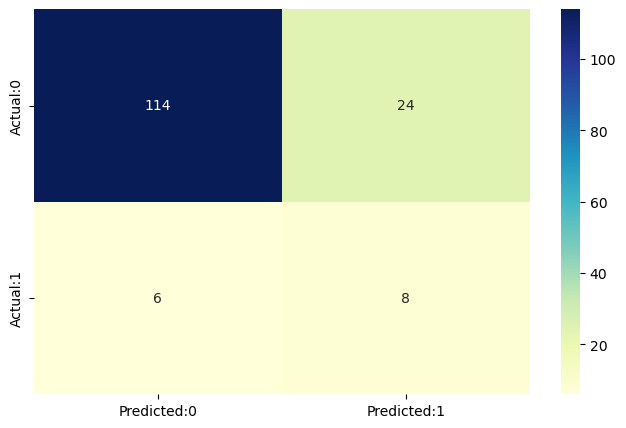

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP = 114, FN = 24, FP = 6, TN = 8

Correct Predictions=TP+TN = 114+8 = 122 Incorrect Predictions=FP+FN = 6+2 = 30

#  Applying Bernoulli Naive bayes for age group 30 to 40

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Filter data for ages between 30 to 40
data_30_to_40 = n_df[(n_df['age'] >= 30) & (n_df['age'] <= 40)].copy()

# Select features and target variable
X = data_30_to_40[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_30_to_40['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the Bernoulli Naive Bayes model
model = BernoulliNB()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9078947368421053


<AxesSubplot:>

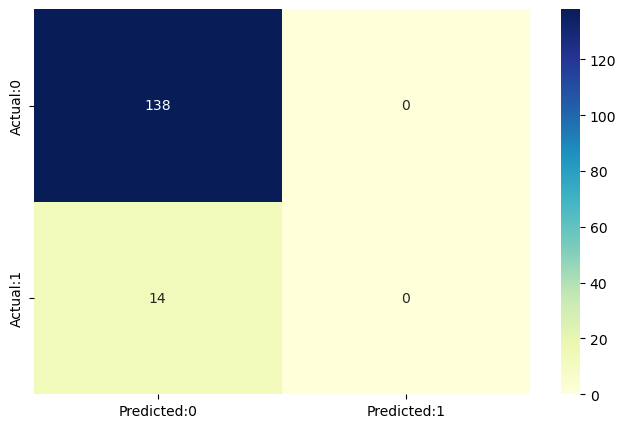

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP = 138, FN = 0, FP = 14, TN = 0

Correct Predictions=TP+TN = 138+0 = 138  Incorrect Predictions=FP+FN = 14+ 0 = 14

# Applying Decision Tree Classifier for age group 30 to 40

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Filter data for ages between 30 to 40
data_30_to_40 = n_df[(n_df['age'] >= 30) & (n_df['age'] <= 40)].copy()

# Select features and target variable
X = data_30_to_40[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_30_to_40['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=1)

# Training the Decision Tree model
model_dt.fit(X_train, y_train)

# Making predictions using Decision Tree Classifier
y_pred_dt = model_dt.predict(X_test)

# Calculating accuracy of Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.868421052631579


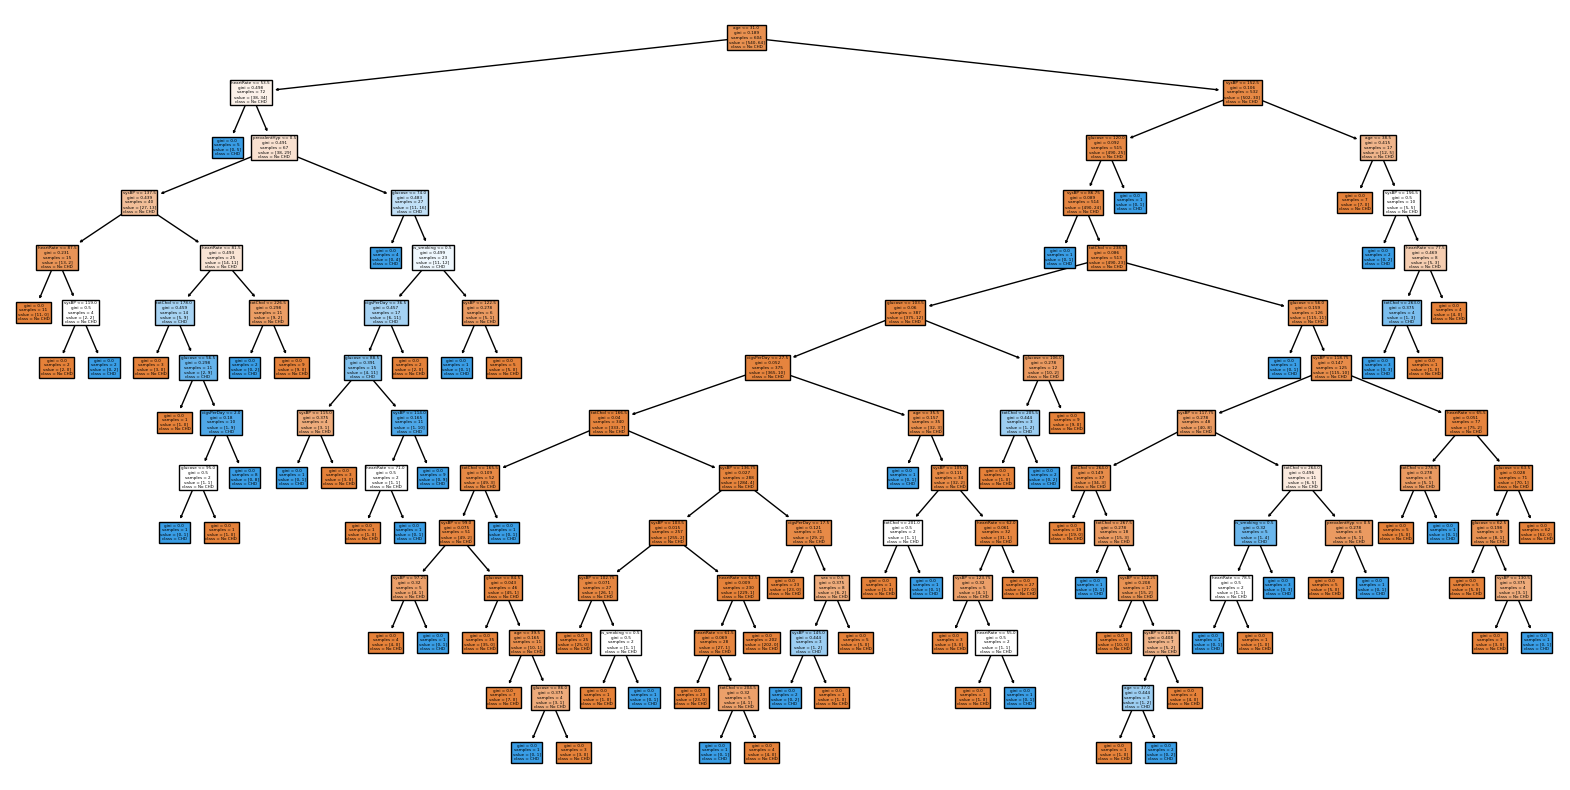

In [84]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the Decision Tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(model_dt, feature_names=X.columns, class_names=['No CHD', 'CHD'], filled=True)
plt.show()


# Applying XGB Classifier for age group 30 to 40

In [85]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [86]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Filter data for ages between 30 to 40
data_30_to_40 = n_df[(n_df['age'] >= 30) & (n_df['age'] <= 40)].copy()

# Select features and target variable
X = data_30_to_40[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_30_to_40['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the XGB classifier model
model_xgb = XGBClassifier(random_state=1)

# Training the XGB classifier model
model_xgb.fit(X_train, y_train)

# Making predictions using XGB classifier model
y_pred_xgb = model_xgb.predict(X_test)

# Calculating accuracy of XGB classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGB classifier Accuracy:", accuracy_xgb)


XGB classifier Accuracy: 0.8947368421052632


# 18. Applying Random Forest for age group 30 to 40

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Filter data for ages between 30 to 40
data_30_to_40 = n_df[(n_df['age'] >= 30) & (n_df['age'] <= 40)].copy()

# Select features and target variable
X = data_30_to_40[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = data_30_to_40['TenYearCHD']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Building the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Training the Random Forest model
model_rf.fit(X_train, y_train)

# Making predictions using Random Forest
y_pred_rf = model_rf.predict(X_test)

# Calculating accuracy of Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9144736842105263


# 19. Insights

## From all the age group , the age group of 30 to 40 has showed more accuracy when models like Logistic regression, Naive Bayes and Random forest was applied.

# 20. Conclusion

## I have applied many ML models like Linear Regression, Multiple Linear Regression, Logistic Regression, K - means clustering, Naive Bayes, Random Forest. 
## But not all models could provide better fit. Models like logistic regression, naive bayes and random forest provides better accuracy ranging from 88 percent to 91 percent.
## When Logistic Regression model was applied on different age group , the age group of 30 to 40 has the highest probability of getting heart disease which was found using ROC_AUC_SCORE which came out to be 91 percent




# 21. Acknowledgement

## While working in this dataset I had apply apply various ml models which helped to think as a Data science and ML students. This wouldn’t be possible without the guidance of my teacher, Sir Ved Prakash Chaubeh where he acted as a guiding torch bearer and helped me in every difficulty I faced throughout this project. Thank you ma’am for providing me different ways to approach to an problem with some slight hints which would assure the success. 

In [88]:
# decision tree - xgb boost - random forest - completed

naive bayes - Gaussian Naïve Bayes, Multinomial Naïve Bayes, Bernoulli Naïve Bayes apply confusion matrix, probability,
roc auc curve - completed


regression - LR , MLR , Logistic regression apply confusion matrix, roc auc durve - complete

Clustering - k means clustering , Hierarchical Clustering complete

In [ ]:
# Building GUI using tkinter

In [ ]:
import tkinter as tk
from tkinter import messagebox
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = n_df[['age', 'sex','is_smoking','cigsPerDay', 'totChol', 'sysBP','heartRate', 'glucose','prevalentHyp']]
y = n_df['TenYearCHD'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


# Function to execute logistic regression model
def execute_logistic_regression():
    try:
        # Get user input
        age = int(age_entry.get())
        sex = int(sex_entry.get())
        is_smoking = int(smoking_entry.get())
        cigs_per_day = int(cigs_per_day_entry.get())
        tot_chol = int(tot_chol_entry.get())
        sys_bp = int(sys_bp_entry.get())
        heart_rate = int(heart_rate_entry.get())
        glucose = int(glucose_entry.get())
        prevalent_hyp = int(prevalent_hyp_entry.get())

        # Executing logistic regression model
        X_test = [[age, sex, is_smoking, cigs_per_day, tot_chol, sys_bp, heart_rate, glucose, prevalent_hyp]]
        y_pred = model.predict(X_test)
        
        # Display output
        if y_pred[0] == 1:
            result_label.config(text="The predicted risk of CHD (TenYearCHD) is HIGH.")
        else:
            result_label.config(text="The predicted risk of CHD (TenYearCHD) is LOW.")
    
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")



# Create Tkinter application window
root = tk.Tk()
root.title("Heart Disease Prediction Model")

# Add labels, entry fields, and buttons to the GUI
age_label = tk.Label(root, text="Age:")
age_label.grid(row=0, column=0)
age_entry = tk.Entry(root)
age_entry.grid(row=0, column=1)

sex_label = tk.Label(root, text="Sex (0 for female, 1 for male):")
sex_label.grid(row=1, column=0)
sex_entry = tk.Entry(root)
sex_entry.grid(row=1, column=1)

smoking_label = tk.Label(root, text="Is Smoking (0 for no, 1 for yes):")
smoking_label.grid(row=2, column=0)
smoking_entry = tk.Entry(root)
smoking_entry.grid(row=2, column=1)

cigs_per_day_label = tk.Label(root, text="Cigarettes Per Day:")
cigs_per_day_label.grid(row=3, column=0)
cigs_per_day_entry = tk.Entry(root)
cigs_per_day_entry.grid(row=3, column=1)

tot_chol_label = tk.Label(root, text="Total Cholesterol:")
tot_chol_label.grid(row=4, column=0)
tot_chol_entry = tk.Entry(root)
tot_chol_entry.grid(row=4, column=1)

sys_bp_label = tk.Label(root, text="Systolic Blood Pressure:")
sys_bp_label.grid(row=5, column=0)
sys_bp_entry = tk.Entry(root)
sys_bp_entry.grid(row=5, column=1)

heart_rate_label = tk.Label(root, text="Heart Rate:")
heart_rate_label.grid(row=6, column=0)
heart_rate_entry = tk.Entry(root)
heart_rate_entry.grid(row=6, column=1)

glucose_label = tk.Label(root, text="Glucose Level:")
glucose_label.grid(row=7, column=0)
glucose_entry = tk.Entry(root)
glucose_entry.grid(row=7, column=1)

prevalent_hyp_label = tk.Label(root, text="Prevalent Hypertension (0 for no, 1 for yes):")
prevalent_hyp_label.grid(row=8, column=0)
prevalent_hyp_entry = tk.Entry(root)
prevalent_hyp_entry.grid(row=8, column=1)

execute_button = tk.Button(root, text="Predict CHD Risk", command=execute_logistic_regression)
execute_button.grid(row=9, column=0, columnspan=2)

result_label = tk.Label(root, text="")
result_label.grid(row=10, column=0, columnspan=2)

# Run Tkinter main loop
root.mainloop()
